# Criação do Dataset Balanceado

In [2]:
from py.DatasetHandler import DatasetHandler

handler = DatasetHandler(logging=True)

handler.create_balanced_dataset(
    src_dir="datasets/CICDDoS2019/Origin/01-12", 
    dest_dir="datasets/CICDDoS2019/data/01-12/Classification", 
    output_filename="BALANCED.CSV", 
    n_samples_per_class=10000,
    chunk_size=100000,
    target_files=None,
    ignored_classes=['WebDDoS'],
    allow_insufficient=True
)

PROCESSAMENTO OTIMIZADO (CHUNKS): BALANCED.CSV
Arquivos Selecionados: 11
Tamanho do Lote (Chunksize): 100000
Classes Ignoradas: ['WebDDoS']

[*] Varredura global (Lendo em lotes)...
[*] Validando quantidades disponíveis...

[*] Coletando e Salvando em disco (Lotes de 100000)...
   -> Processando: DrDoS_DNS.csv
   -> Processando: DrDoS_LDAP.csv
   -> Processando: DrDoS_MSSQL.csv
   -> Processando: DrDoS_NetBIOS.csv
   -> Processando: DrDoS_NTP.csv
   -> Processando: DrDoS_SNMP.csv
   -> Processando: DrDoS_SSDP.csv
   -> Processando: DrDoS_UDP.csv
   -> Processando: Syn.csv
      [IO] Buffer cheio (100000 linhas). Salvando lote no disco...
   -> Processando: TFTP.csv
   -> Processando: UDPLag.csv
      [IO] Salvando lote final (20000 linhas)...

CONCLUÍDO COM SUCESSO
Arquivo gerado: datasets/CICDDoS2019/data/01-12/Classification\BALANCED.CSV


In [ ]:
from py.DatasetHandler import DatasetHandler

handler = DatasetHandler(logging=True)

handler.create_balanced_dataset(
    src_dir="datasets/CIC-IDS-2017/Origin", 
    dest_dir="datasets/CIC-IDS-2017/data/Classification", 
    output_filename="Balanced.CSV", 
    n_samples_per_class=5000,
    chunk_size=100000,
    target_files=['Friday-WorkingHours-Afternoon-DDos.csv', 'Wednesday-workingHours.csv'],
    ignored_classes=['Heartbleed'],
    allow_insufficient=False
)

PROCESSAMENTO OTIMIZADO (CHUNKS): Balanced.CSV
Arquivos Selecionados: 2
Tamanho do Lote (Chunksize): 100000
Classes Ignoradas: ['Heartbleed']

[1/3] Varredura global (Lendo em lotes)...
[2/3] Validando quantidades disponíveis...

[3/3] Coletando e Salvando em disco (Lotes de 100000)...
   -> Processando: Friday-WorkingHours-Afternoon-DDos.csv
   -> Processando: Wednesday-workingHours.csv
      [IO] Salvando lote final (30000 linhas)...

CONCLUÍDO COM SUCESSO
Arquivo gerado: datasets/CIC-IDS-2017/data/Classification\Balanced.CSV


# Criando gráfico de radar

Limpeza: Removendo espaços, identificadores (Flow ID, Timestamp, Unnamed: 0) e colunas vazias...
Pré-processamento: Convertendo infinitos...
Tratamento de Nulos: Preenchendo com a MEDIANA das colunas...
Normalização: MinMaxScaler
Target: Processando coluna 'Label' como Multiclasse...
Seleção de Features: Iniciando pipeline de redução de dimensionalidade...

--- Iniciando Processo de Seleção de Features (Total: 78) ---
Variância: 46 features removidas. Restantes: 32
Remover Correlação: Pular.
Random Forest: Top 15 selecionadas.
Features Finais (15) - ['Average Packet Size', 'Avg Fwd Segment Size', 'Packet Length Mean', 'Fwd Packet Length Mean', 'Min Packet Length', 'Fwd Packet Length Min', 'Flow Duration', 'Fwd IAT Total', 'Flow Bytes/s', 'Fwd IAT Std', 'Flow IAT Max', 'Init_Win_bytes_forward', 'Flow IAT Std', 'min_seg_size_forward', 'ACK Flag Count']
--- Fim do Processo de Seleção de Features ---

Finalização: Retornando DataFrame pandas processado.



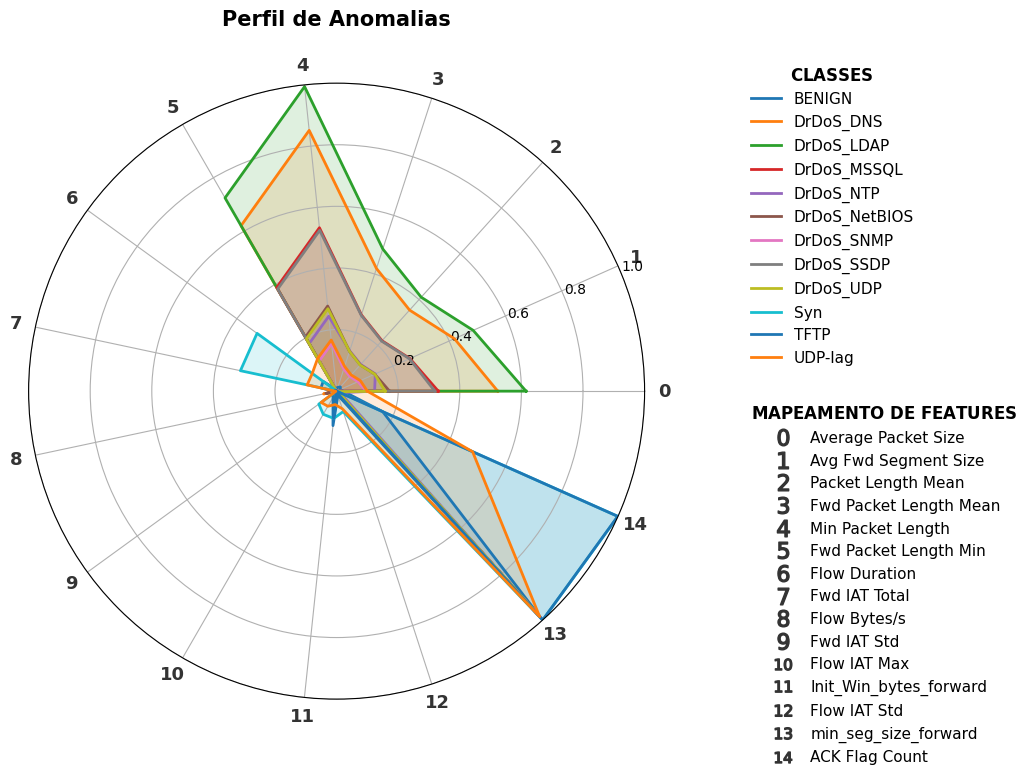

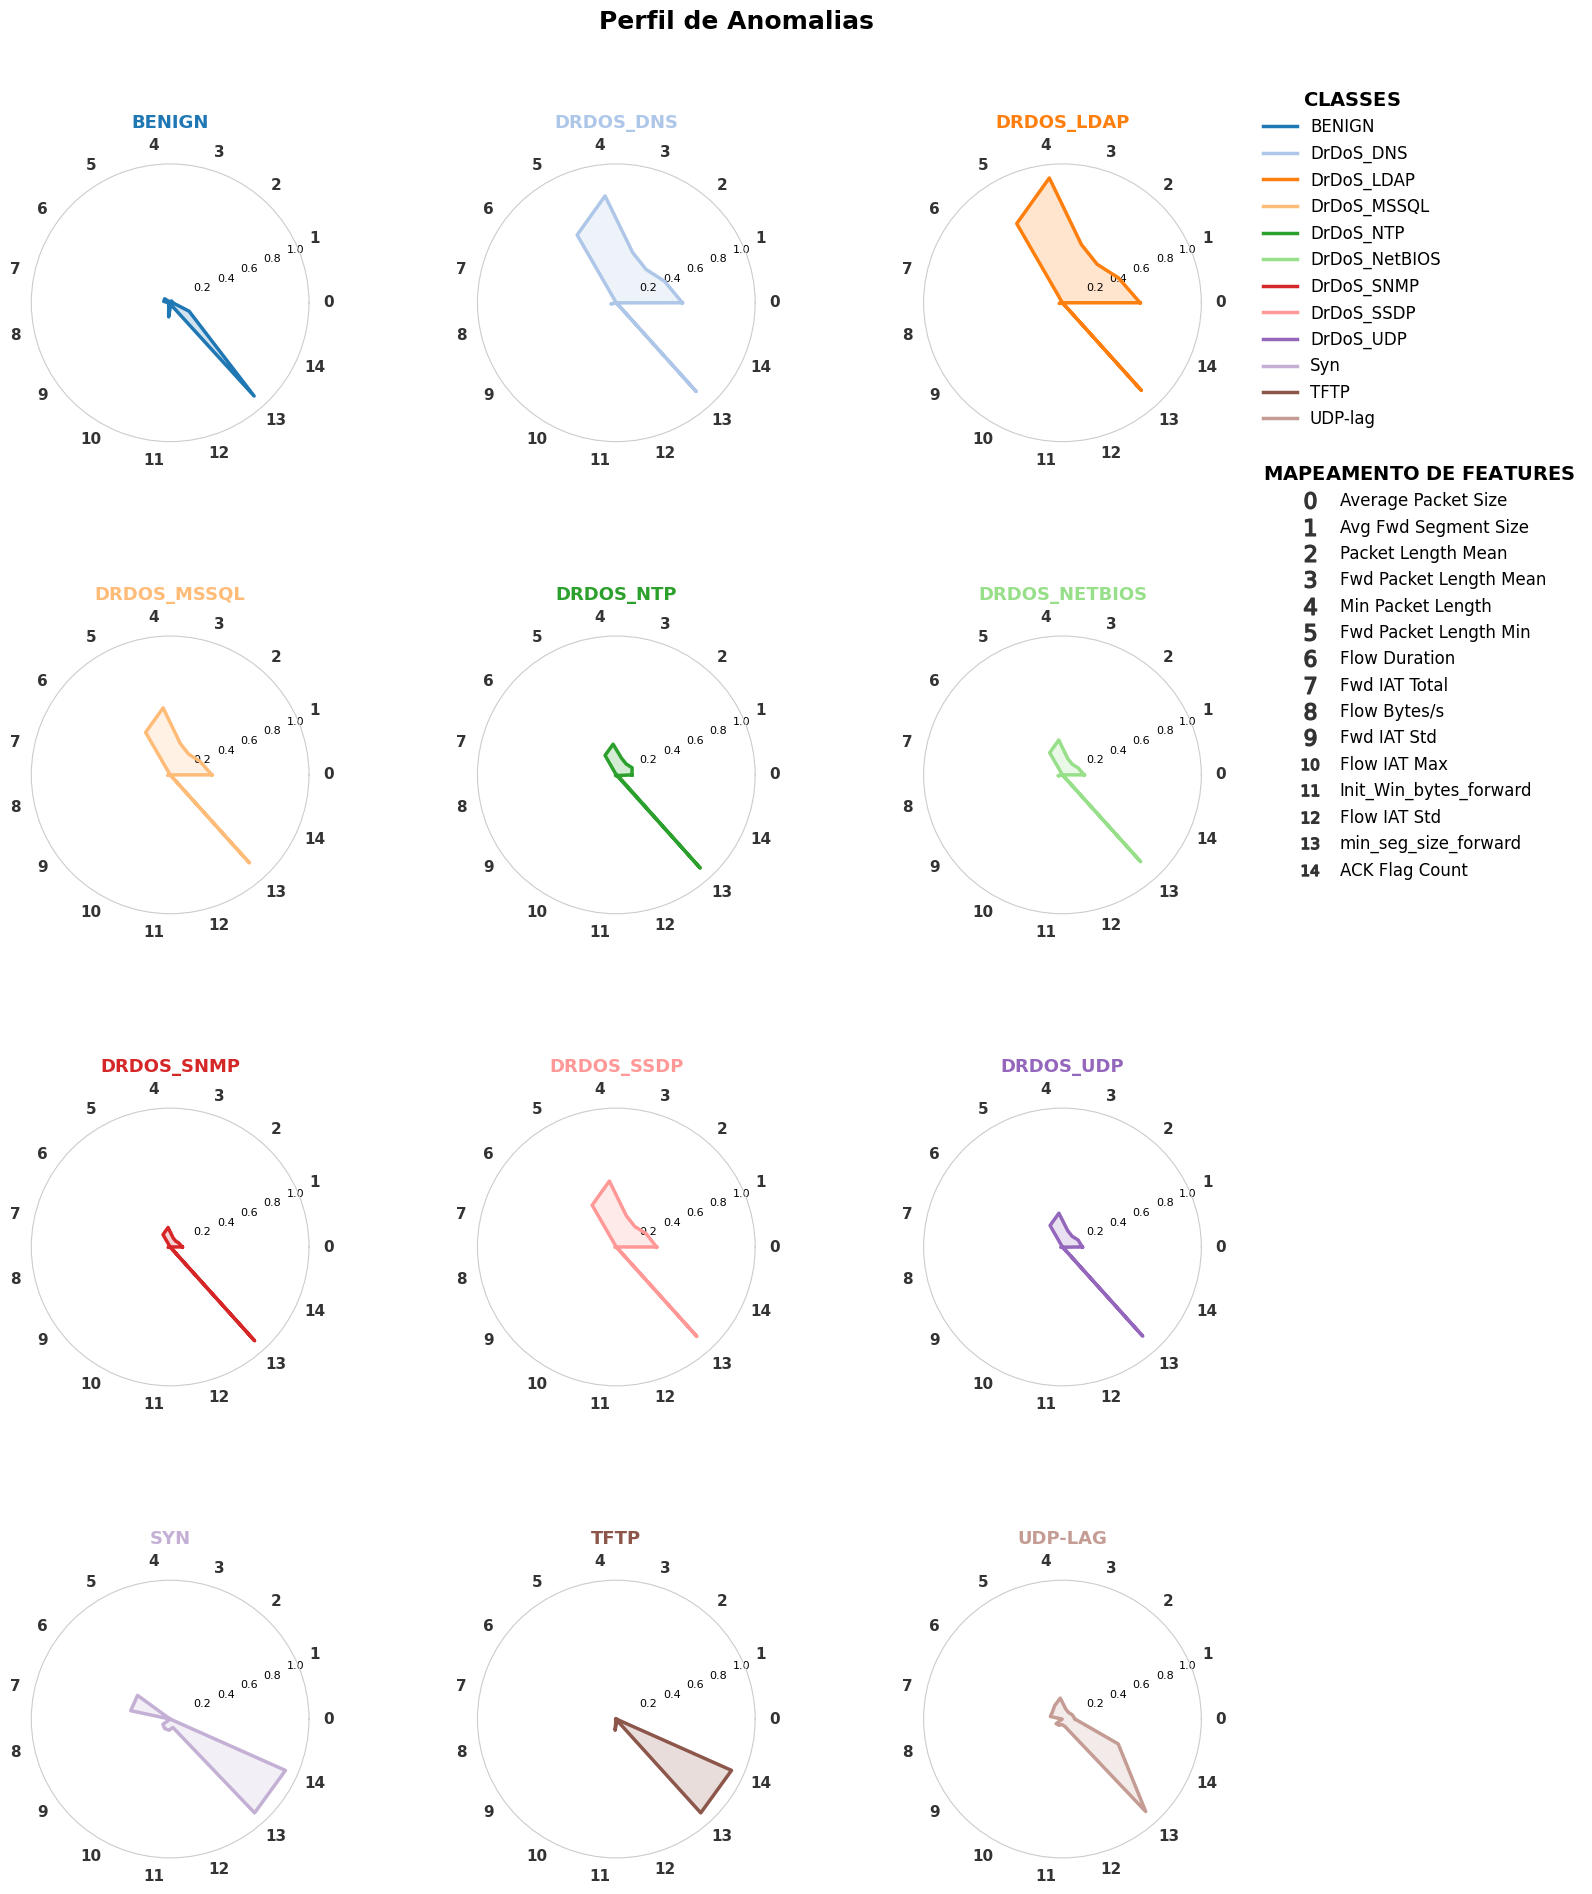


 INICIANDO ANÁLISE DE SIMILARIDADE DE ATAQUES (CLUSTERING HIERÁRQUICO)
 [!] Erro ao calcular distância Manhattan: Unable to allocate 53.6 GiB for an array with shape (7199940000,) and data type float64
 [!] Erro ao calcular distância Euclidiana: Unable to allocate 53.6 GiB for an array with shape (7199940000,) and data type float64
 [!] Erro ao calcular distância Cosseno: Unable to allocate 53.6 GiB for an array with shape (7199940000,) and data type float64


In [ ]:
from py.DataStreamProcessor import DataStreamProcessor
from py.DatasetHandler import DatasetHandler
import pandas as pd

handler = DatasetHandler(logging=True)
processor = DataStreamProcessor(logging=True)

df = pd.read_csv('datasets/CICDDoS2019/data/01-12/BALANCED.CSV')

stream, targets, features = processor.create_stream(
    df=df, 
    target_label_col='Label', 
    binary_label=False, 
    normalize_method="MinMaxScaler", 
    threshold_var=0.001,
    threshold_corr=None,
    top_n_features=15,
    return_stream=False,
    extra_ignore_cols=['Source IP', 'Source Port','Destination IP','Destination Port','Protocol'],
    imputation_method='mediana'
)

handler.plot_feature_radar(stream, targets, features)
handler.plot_mini_radars(stream, targets, features)

# Criação de cenários

## CICDDoS2019

### Cenário de Consistência

![DNS_DNS](datasets/CICDDoS2019/img/DNS_DNS.png)

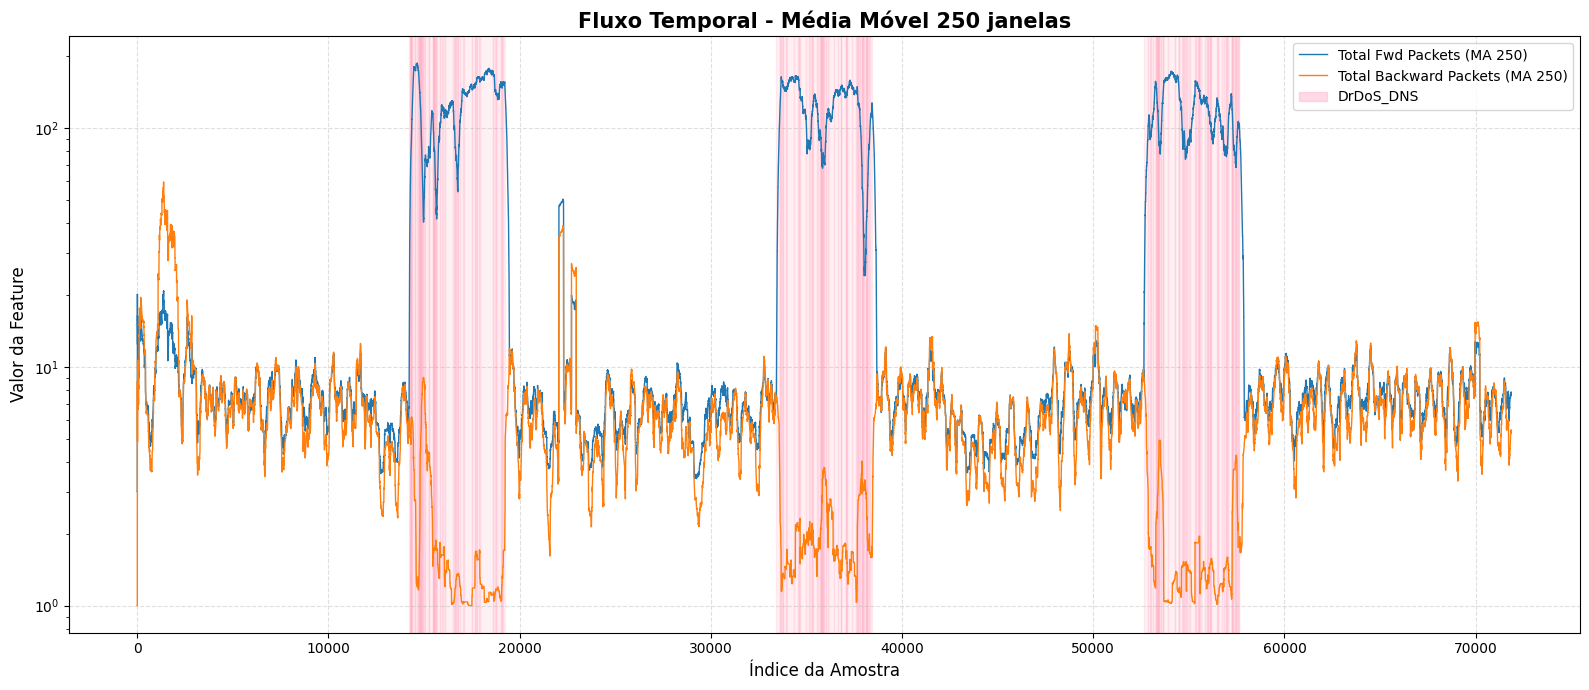

In [3]:
from py.ScenarioGenerator import ScenarioGenerator

meu_cenario = [
    ("DrDoS_DNS.csv", 5000),
    ("DrDoS_DNS.csv", 5000),
    ("DrDoS_DNS.csv", 5000)
]

gerador = ScenarioGenerator(
    input_folder="datasets/CICDDoS2019/Origin/01-12",
    output_path="datasets/CICDDoS2019/data/01-12/Classification/DNS_DNS_DNS.csv",
    baseline_file="datasets/CICDDoS2019/data/01-12/BENIGN.csv",
    logging=False,
    sort_by_timestamp=False,
    remove_duplicates=False
)

gerador.generate(meu_cenario)
gerador.plot_scenario(window_size=250, features_plot=['Total Fwd Packets', 'Total Backward Packets'])

### Cenário Generalização 1

![DNS_LDAP](datasets/CICDDoS2019/img/DNS_LDAP.png)

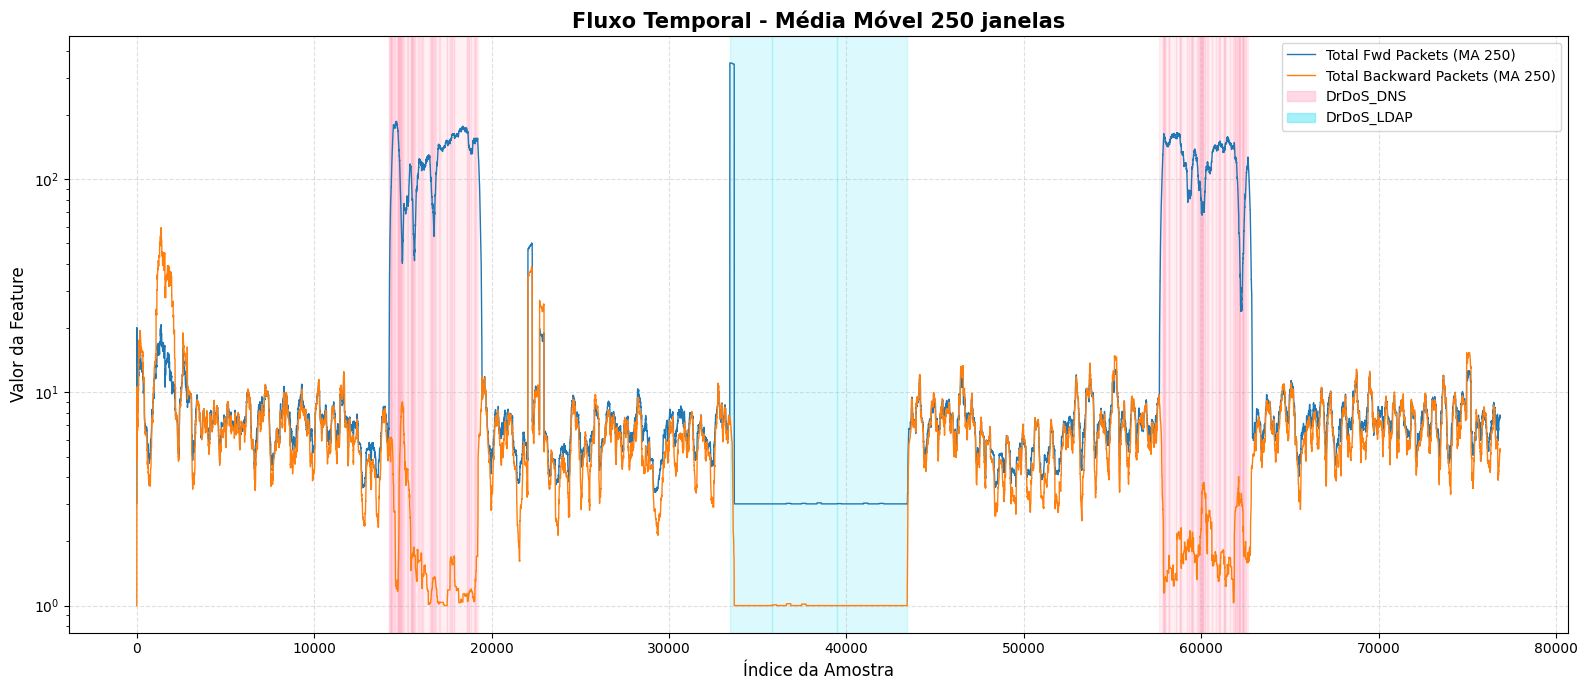

In [3]:
from py.ScenarioGenerator import ScenarioGenerator

meu_cenario = [
    ("DrDoS_DNS.csv", 5000),
    ("DrDoS_LDAP.csv", 10000),
    ("DrDoS_DNS.csv", 5000)
]

gerador = ScenarioGenerator(
    input_folder="datasets/CICDDoS2019/Origin/01-12",
    output_path="datasets/CICDDoS2019/data/01-12/Classification/DNS_LDAP_DNS.csv",
    baseline_file="datasets/CICDDoS2019/data/01-12/BENIGN.csv",
    logging=False,
    sort_by_timestamp=False,
    remove_duplicates=False
)

gerador.generate(meu_cenario)
gerador.plot_scenario(window_size=250, features_plot=['Total Fwd Packets', 'Total Backward Packets'])

### Cenário Generalização 2

![Portmap_NetBIOS](datasets/CICDDoS2019/img/Portmap_NetBIOS.png)


[*] Fase 1: Baseline não encontrado. Processando arquivos da pasta datasets/CICDDoS2019/Origin/03-11...
    Lendo: LDAP.csv...
    Lendo: MSSQL.csv...
    Lendo: NetBIOS.csv...
    Lendo: Portmap.csv...
    Lendo: Syn.csv...
    Lendo: UDP.csv...
    Lendo: UDPLag.csv...
    Concatenando DataFrame e ordenando por Timestamp...
    Salvando 56965 amostras no arquivo base...

[*] Fase 2: Coletando fatias de ataque (Linha a Linha)...
    -> Coletadas 5000 amostras de Portmap.csv.
    -> Coletadas 5000 amostras de NetBIOS.csv.

[*] Fase 3: Montando fluxo intercalado...
    Dividindo 56965 BENIGN em 3 fatias de aprox. 18988 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN     60672
NetBIOS     5000
Portmap     1293


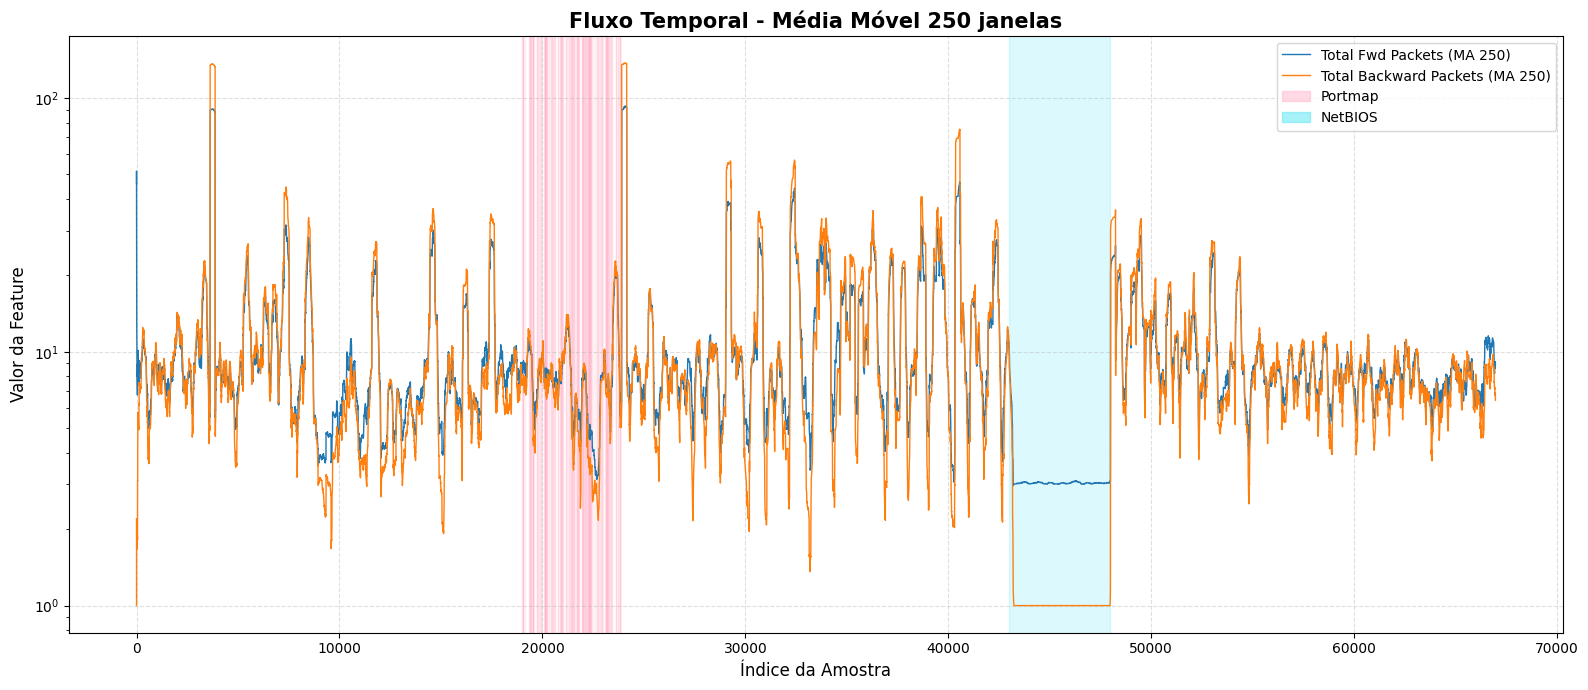

In [1]:
from py.ScenarioGenerator import ScenarioGenerator

meu_cenario = [
    ("Portmap.csv", 5000),
    ("NetBIOS.csv", 5000)
]

gerador = ScenarioGenerator(
    input_folder="datasets/CICDDoS2019/Origin/03-11",
    output_path="datasets/CICDDoS2019/data/03-11/Classification/Portmap_NetBIOS.csv",
    baseline_file="datasets/CICDDoS2019/data/03-11/BENIGN.csv",
    logging=True,
    sort_by_timestamp=False,
    remove_duplicates=False
)

gerador.generate(meu_cenario)
gerador.plot_scenario(window_size=250, features_plot=['Total Fwd Packets', 'Total Backward Packets'])

## CIC-IDS-2017

### Cenário de Consistência

![SLOW_SLOW](datasets/CIC-IDS-2017/img/SLOW_SLOW.png)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 440031 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 50000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 50000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 2000 amostras de Wednesday-workingHours.csv (Filtro: DoS Slowhttptest).
    -> Bloco montado: 2000 amostras de Wednesday-workingHours.csv (Filtro: DoS Slowhttptest).

    [AVISO] Limite do arquivo 'Wednesday-workingHours.csv' atingido!
            -> Solicitado: 2000 | Encontrado: 1499
            -> O cenário continuará utilizando as 1499 amostras obtidas.

    -> Bloco montado: 1499 amostras de Wednesday-workingHours.csv (Filtro: DoS Slowhttptest).

[*] Montando fluxo intercalado...
    Dividindo 50000 BENIGN

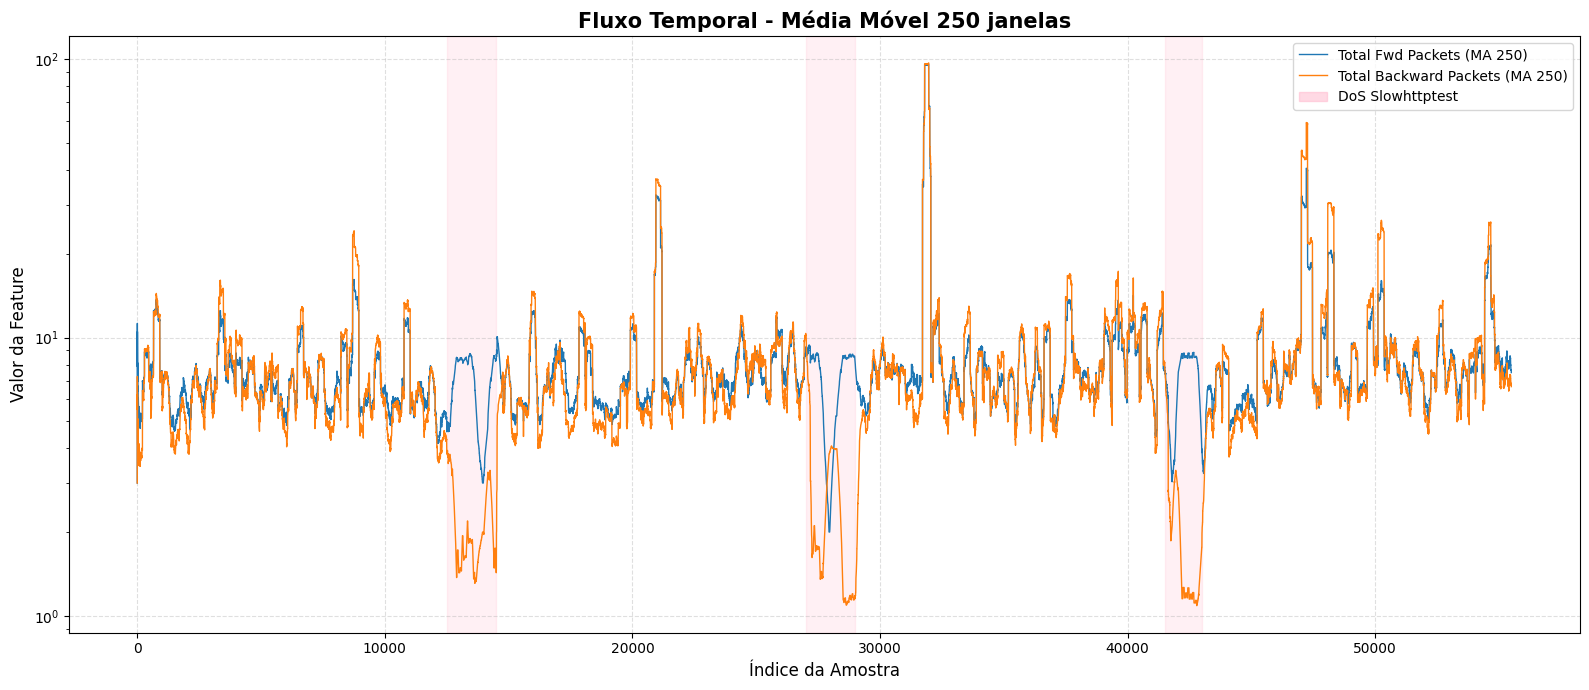

In [4]:
from py.ScenarioGenerator import ScenarioGenerator

meu_cenario = [
    ("Wednesday-workingHours.csv", 2000, "DoS Slowhttptest"),
    ("Wednesday-workingHours.csv", 2000, "DoS Slowhttptest"),
    ("Wednesday-workingHours.csv", 2000, "DoS Slowhttptest")
]

gerador = ScenarioGenerator(
    input_folder="datasets/CIC-IDS-2017/Origin",
    output_path="datasets/CIC-IDS-2017/data/Classification/Slowhttptest_x3.csv",
    baseline_file="datasets/CIC-IDS-2017/data/BENIGN_Wednesday.csv",
    target_files=["Wednesday-workingHours.csv"],
    n_benign_samples=50000,
    logging=True,
    sort_by_timestamp=False,
    remove_duplicates=False
)

gerador.generate(meu_cenario)
gerador.plot_scenario(window_size=250, features_plot=['Total Fwd Packets', 'Total Backward Packets'])

### Cenário Generalização

![HULK_DDoS](datasets/CIC-IDS-2017/img/HULK_DDoS.png)


[*] Baseline não encontrado. Processando arquivos da pasta datasets/CIC-IDS-2017/Origin...
    -> Filtro ativo: Lendo apenas os 2 arquivos especificados.
    Lendo: Wednesday-workingHours.csv...
    Lendo: Friday-WorkingHours-Afternoon-DDos.csv...
    Concatenando DataFrame e ordenando por Timestamp...
    Salvando 537749 amostras no arquivo base...

[*] Reduzindo amostras benignas para 50000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 50000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 5000 amostras de Wednesday-workingHours.csv (Filtro: DoS Hulk).
    -> Bloco montado: 5000 amostras de Friday-WorkingHours-Afternoon-DDos.csv (Filtro: DDoS).

[*] Montando fluxo intercalado...
    Dividindo 50000 BENIGN em 3 fatias de aprox. 16666 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
--------------------------------

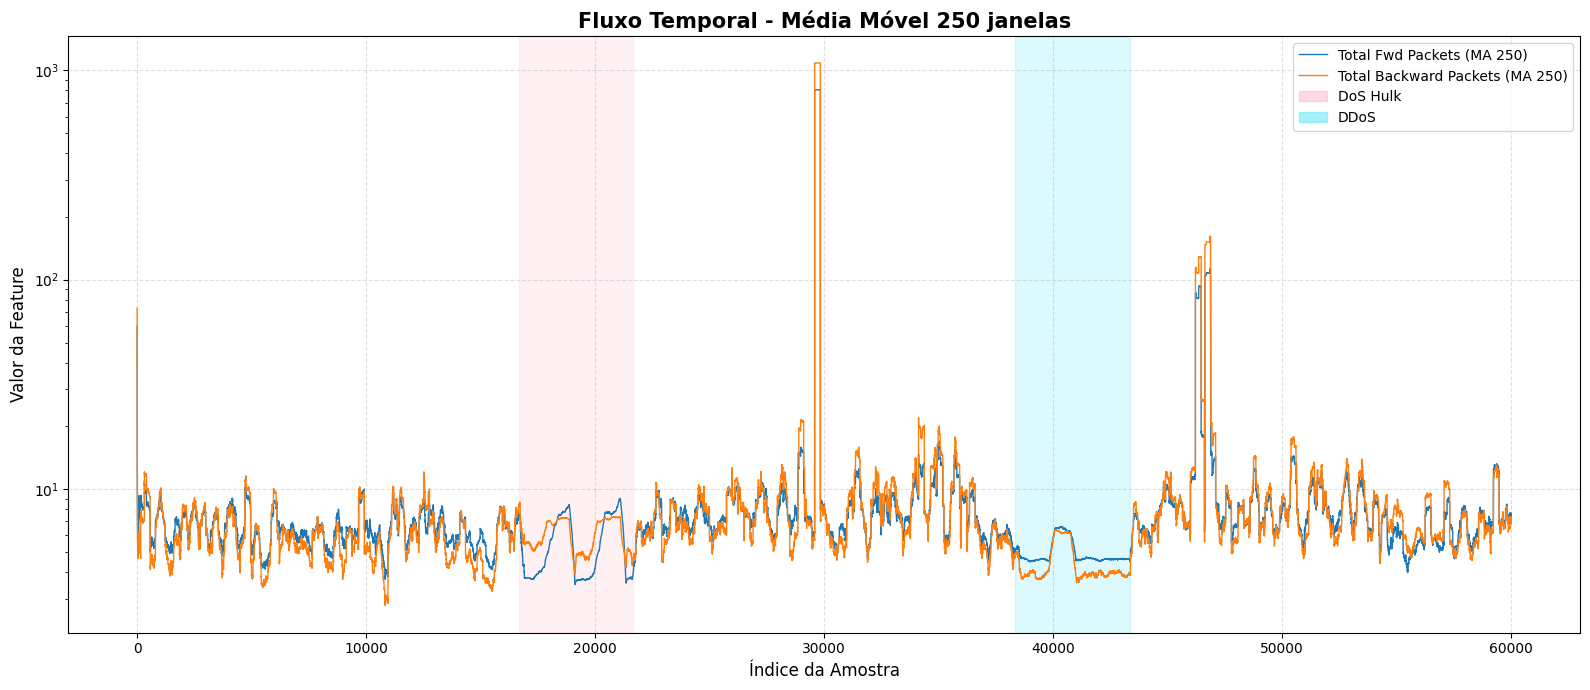

In [5]:
from py.ScenarioGenerator import ScenarioGenerator

meu_cenario = [
    ("Wednesday-workingHours.csv", 5000, "DoS Hulk"),
    ("Friday-WorkingHours-Afternoon-DDos.csv", 5000, "DDoS")
]

gerador = ScenarioGenerator(
    input_folder="datasets/CIC-IDS-2017/Origin",
    output_path="datasets/CIC-IDS-2017/data/Classification/DoSHulk_DDoS.csv",
    baseline_file="datasets/CIC-IDS-2017/data/BENIGN_Wednesday_Friday.csv",
    target_files=["Wednesday-workingHours.csv", "Friday-WorkingHours-Afternoon-DDos.csv"],
    n_benign_samples=50000,
    logging=True,
    sort_by_timestamp=False,
    remove_duplicates=False
)

gerador.generate(meu_cenario)
gerador.plot_scenario(window_size=250, features_plot=['Total Fwd Packets', 'Total Backward Packets'])